In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline
 
import warnings
warnings.filterwarnings("ignore")
#import logisticregression


In [3]:
cars_df = pd.read_csv('Cardekho_cleaned.csv')

In [4]:
cars_df.head()

,id,car_name,brand,model,new_price,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,NaN,NaN,NaN,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,711000.0,748000.0,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,NaN,NaN,NaN,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,NaN,NaN,NaN,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,1014000.0,1379000.0,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
cars_df.isna().sum()

id                       0
car_name                 0
brand                    0
model                    0
new_price            10102
min_cost_price       10102
max_cost_price       10102
vehicle_age              0
km_driven                0
seller_type              0
fuel_type                0
transmission_type        0
mileage                  0
engine                   0
max_power                0
seats                    0
selling_price            0
dtype: int64

In [6]:
cars_df.shape

(19544, 17)

In [7]:
cars_df.drop(['min_cost_price', 'max_cost_price','id','new_price'], axis=1, inplace= True)

In [8]:
cars_df.sample(30)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
8414,Maruti Wagon R,Maruti,Wagon R,11,40000,Individual,Petrol,Manual,17.30,1061,64.00,5,250000
11065,Maruti Swift,Maruti,Swift,1,1500,Individual,Diesel,Manual,28.40,1248,74.00,5,685000
930,Maruti Swift Dzire,Maruti,Swift Dzire,3,43000,Dealer,Petrol,Automatic,21.21,1197,81.80,5,610000
10329,Maruti Ciaz,Maruti,Ciaz,2,15000,Individual,Petrol,Manual,21.56,1462,103.25,5,875000
1833,Tata Indigo,Tata,Indigo,11,80000,Individual,Diesel,Manual,17.00,1405,70.00,5,134000
14911,Maruti A,Maruti,A,11,44500,Dealer,Petrol,Manual,19.00,998,66.10,5,295000
6768,Maruti Swift Dzire,Maruti,Swift Dzire,2,15000,Individual,Diesel,Automatic,28.40,1248,74.02,5,800000
433,Tata Tigor,Tata,Tigor,3,40000,Individual,Petrol,Manual,20.30,1199,84.00,5,470000
8811,Honda Amaze,Honda,Amaze,8,65675,Dealer,Diesel,Manual,25.80,1498,98.60,5,490000
5279,Maruti 800,Maruti,800,20,70000,Individual,Petrol,Manual,16.10,796,37.00,4,45000


In [9]:
cars_df.describe(include='all')

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
count,19544,19544,19544,19544.000000,1.954400e+04,19544,19544,19544,19544.000000,19544.000000,19544.000000,19544.000000,1.954400e+04
unique,262,42,258,NaN,NaN,3,5,2,NaN,NaN,NaN,NaN,NaN
top,Hyundai i20,Maruti,i20,NaN,NaN,Dealer,Diesel,Manual,NaN,NaN,NaN,NaN,NaN
freq,906,5547,906,NaN,NaN,11724,9642,15676,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.380679,5.787039e+04,NaN,NaN,NaN,19.508034,1478.475440,99.406093,5.322094,7.430564e+05
std,NaN,NaN,NaN,3.153315,5.054194e+04,NaN,NaN,NaN,4.075184,519.050849,43.715147,0.839753,9.090158e+05
min,NaN,NaN,NaN,0.000000,1.000000e+02,NaN,NaN,NaN,4.000000,624.000000,34.200000,0.000000,3.000000e+04
25%,NaN,NaN,NaN,4.000000,3.100000e+04,NaN,NaN,NaN,16.950000,1197.000000,73.940000,5.000000,3.490000e+05
50%,NaN,NaN,NaN,6.000000,5.148950e+04,NaN,NaN,NaN,19.300000,1248.000000,86.800000,5.000000,5.250000e+05
75%,NaN,NaN,NaN,8.000000,7.300100e+04,NaN,NaN,NaN,22.320000,1582.000000,113.420000,5.000000,7.890000e+05


In [10]:
cars_df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

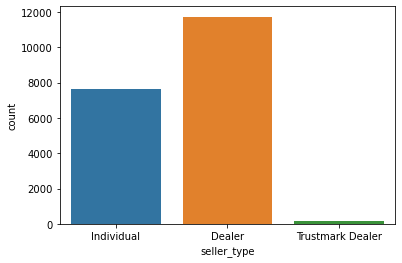

In [11]:
sns.countplot(cars_df["seller_type"])

In [12]:
cars_df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

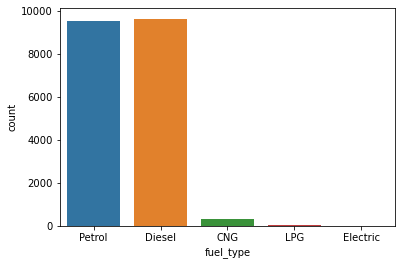

In [13]:
sns.countplot(cars_df["fuel_type"])

In [14]:
cars_df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

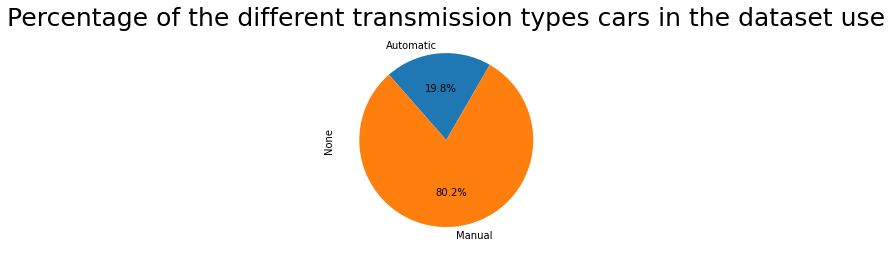

In [15]:
cars_df.groupby('transmission_type').size().plot(kind='pie', startangle =60, autopct='%1.1f%%')
plt.title('Percentage of the different transmission types cars in the dataset use', fontsize=25)
plt.show()

In [16]:
cars_df['brand'].nunique()

42

In [17]:
cars_df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [18]:
cars_df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [19]:
duplicates = cars_df[cars_df.duplicated()]
duplicates

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
261,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
268,Mahindra TUV,Mahindra,TUV,5,70000,Individual,Diesel,Manual,18.49,1493,100.00,7,450000
462,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1739,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1794,Maruti S-Cross,Maruti,S-Cross,4,70000,Individual,Diesel,Manual,25.10,1248,88.50,5,740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19311,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
19434,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
19489,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
19505,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [20]:
correlations = cars_df.corr()
correlations

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.320193,-0.273155,0.063407,-0.039099,0.001113,-0.267211
km_driven,0.320193,1.000000,-0.093748,0.176942,0.019957,0.177385,-0.103680
mileage,-0.273155,-0.093748,1.000000,-0.616750,-0.523451,-0.392758,-0.289664
engine,0.063407,0.176942,-0.616750,1.000000,0.809512,0.484861,0.587358
max_power,-0.039099,0.019957,-0.523451,0.809512,1.000000,0.134667,0.750761
seats,0.001113,0.177385,-0.392758,0.484861,0.134667,1.000000,0.073442
selling_price,-0.267211,-0.103680,-0.289664,0.587358,0.750761,0.073442,1.000000


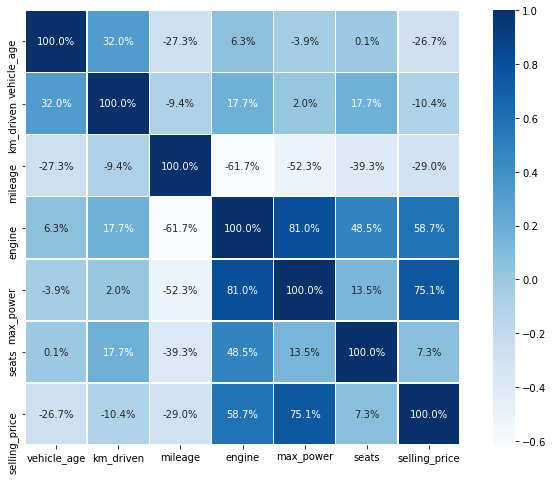

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, fmt='.1%', square=True, linewidth=.5, cmap='Blues')
plt.show()

In [22]:
max_prices = cars_df.groupby('selling_price').max()
max_prices

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
selling_price,,,,,,,,,,,,
30000,Tata Nano,Tata,Nano,11,80000,Individual,Petrol,Manual,26.00,624,35.0,4
32500,Tata Indica,Tata,Indica,15,295000,Individual,Petrol,Manual,13.50,1405,60.0,5
34000,Maruti 800,Maruti,800,22,120000,Individual,Petrol,Manual,16.10,796,37.0,4
35000,Tata Indica,Tata,Indica,18,100000,Individual,Diesel,Manual,17.88,1396,53.5,5
40000,Tata Nano,Tata,Wagon R,22,105000,Individual,Petrol,Manual,26.00,1405,68.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
14500000,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.50,5998,626.0,4
15000000,Lamborghini Gallardo,Lamborghini,Gallardo,8,4000,Dealer,Petrol,Automatic,6.40,5204,560.0,2
23500000,Bentley Mulsanne,Bentley,Mulsanne,9,15000,Dealer,Petrol,Automatic,10.10,6752,505.0,5


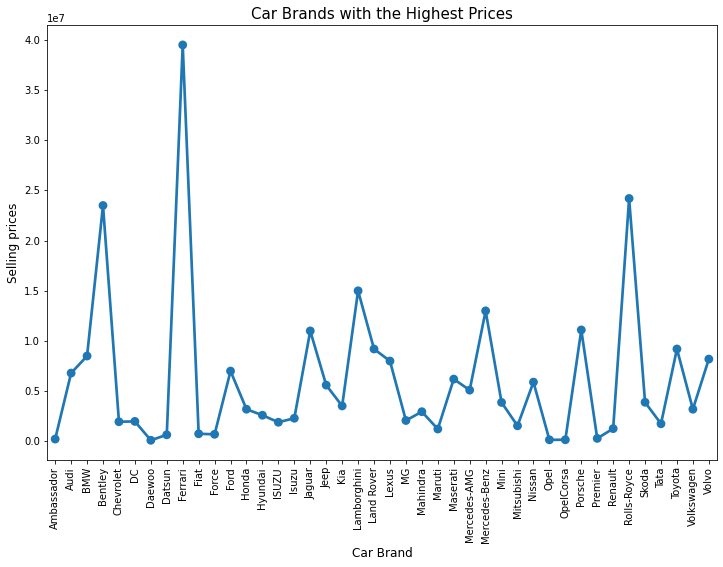

In [23]:
group2 = cars_df.groupby(["brand"])["selling_price"].aggregate("max").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(group2['brand'].values, group2['selling_price'].values, alpha=0.8)
#plt.barh(group2['brand'].values, group2['selling_price'].values)
plt.ylabel('Selling prices', fontsize=12)
plt.xlabel('Car Brand', fontsize=12)
plt.title("Car Brands with the Highest Prices", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

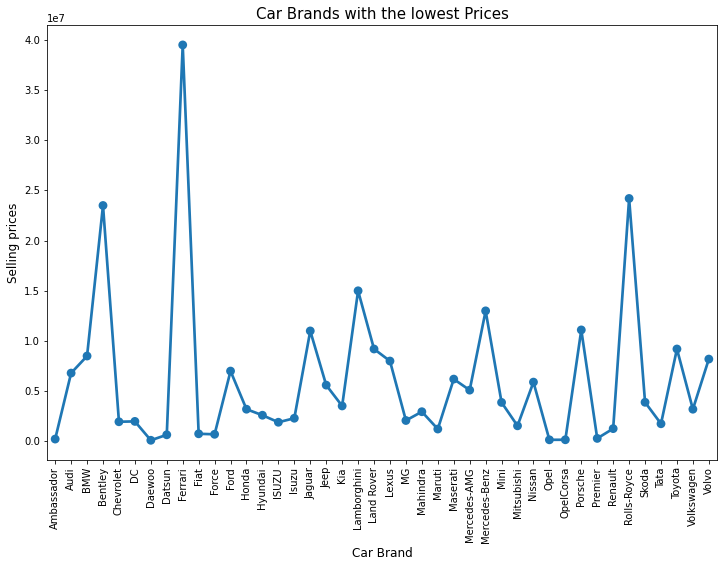

In [24]:
group3 = cars_df.groupby(["brand"])["selling_price"].aggregate("min").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(group2['brand'].values, group2['selling_price'].values, alpha=0.8)
#plt.barh(group3['brand'].values, group3['selling_price'].values)
plt.ylabel('Selling prices', fontsize=12)
plt.xlabel('Car Brand', fontsize=12)
plt.title("Car Brands with the lowest Prices", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
cars_df= pd.get_dummies(data = cars_df, columns = ["car_name","brand","model","seller_type","fuel_type","transmission_type"])

In [26]:
cars_df.dtypes

vehicle_age                      int64
km_driven                        int64
mileage                        float64
engine                           int64
max_power                      float64
                                ...   
fuel_type_Electric               uint8
fuel_type_LPG                    uint8
fuel_type_Petrol                 uint8
transmission_type_Automatic      uint8
transmission_type_Manual         uint8
Length: 579, dtype: object

In [27]:
y = cars_df.selling_price

X= cars_df

X= X.drop(["selling_price"], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13680, 578), (13680,), (5864, 578), (5864,))

In [42]:
model = RandomForestRegressor(n_estimators=210)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)


R2: 0.9126492907266454


In [36]:
from sklearn.tree import DecisionTreeClassifier
decisiontreemodel = DecisionTreeClassifier()

decisiontreemodel.fit(X_train, y_train)
pred = decisiontreemodel.predict(X_test)
r2 = r2_score(y_test, pred)
print("R2 Score:", r2)

R2 Score: 0.8008835943988971


In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
r2 = r2_score(y_test, preds)
print("R2 Score:", r2)

R2 Score: 0.629710490502984


In [38]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel = KNeighborsRegressor()
knnmodel.fit(X_train, y_train)
predy = knnmodel.predict(X_test)
r2 = r2_score(y_test, predy)
print("R2 Score:", r2)

R2 Score: 0.6184407929115987


In [43]:
from sklearn.svm import SVR
svrmodel = SVR(kernel='linear')
svrmodel.fit(X_train, y_train)
predic = svrmodel.predict(X_test)
r2 = r2_score(y_test, predic)
print("R2 Score:", r2)

R2 Score: 0.5680769107288902
